In [1]:
import pandas as pd
fish = pd.read_csv('fish.csv')
print(fish.head())


  Species  Weight  Length  Diagonal   Height   Width
0   Bream   242.0    25.4      30.0  11.5200  4.0200
1   Bream   290.0    26.3      31.2  12.4800  4.3056
2   Bream   340.0    26.5      31.1  12.3778  4.6961
3   Bream   363.0    29.0      33.5  12.7300  4.4555
4   Bream   430.0    29.0      34.0  12.4440  5.1340


In [2]:
fishInput = fish[['Weight', 'Length', 'Diagonal','Height','Width']].to_numpy()
fishTarget = fish['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split

trainInput, testInput, trainTarget, testTarget = train_test_split(fishInput, fishTarget, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(trainInput)
trainScaled = ss.transform(trainInput)
testScaled = ss.transform(testInput)
trainScaled

array([[ 9.19657820e-01,  6.09431747e-01,  8.10412209e-01,
         1.85194896e+00,  1.00075672e+00],
       [ 3.00412188e-01,  1.54653445e+00,  1.45316551e+00,
        -4.69816625e-01,  2.72917446e-01],
       [-1.08585360e+00, -1.68646987e+00, -1.70848587e+00,
        -1.70159849e+00, -2.00447580e+00],
       [-7.97341433e-01, -6.08801762e-01, -6.74869070e-01,
        -8.24805885e-01, -2.76314705e-01],
       [-7.12898847e-01, -7.30625113e-01, -7.00926637e-01,
        -8.02298036e-02, -7.03386897e-01],
       [-9.12746301e-01, -9.64900787e-01, -9.52816444e-01,
        -8.80171862e-01, -9.91535662e-01],
       [-7.97341433e-01, -7.02512032e-01, -7.61727625e-01,
        -7.82824547e-01, -5.44530184e-01],
       [ 6.38182533e-01,  5.62576612e-01,  7.32239510e-01,
         1.64473401e+00,  5.07057367e-01],
       [-7.41046376e-01, -6.74398951e-01, -7.35670058e-01,
        -6.12059278e-01, -5.57331377e-01],
       [-8.67710255e-01, -7.96222301e-01, -8.92015456e-01,
        -9.33586942e-01

In [7]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(trainScaled, trainTarget)
print(sc.score(trainScaled, trainTarget))
print(sc.score(testScaled, testTarget))


0.773109243697479
0.775


C:\Users\lotco\.conda\envs\tf36\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [8]:
#기존 모델에 추가 학습

sc.partial_fit(trainScaled, trainTarget)
print(sc.score(trainScaled, trainTarget))
print(sc.score(testScaled, testTarget))


0.8151260504201681
0.825


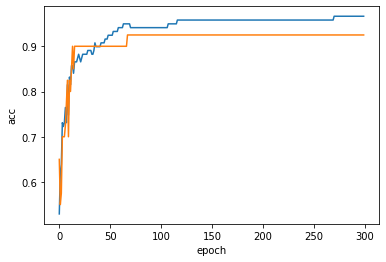

In [9]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
trainScore = []
testScore= []
classes = np.unique(trainTarget)

for _ in range(0, 300):
    sc.partial_fit(trainScaled, trainTarget, classes=classes)
    trainScore.append(sc.score(trainScaled, trainTarget))
    testScore.append(sc.score(testScaled, testTarget))
    
import matplotlib.pyplot as plt
plt.plot(trainScore)
plt.plot(testScore)
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [11]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(trainScaled, trainTarget)
print(sc.score(trainScaled, trainTarget))
print(sc.score(testScaled, testTarget))


0.957983193277311
0.925
